In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
filepath = "/content/KaggleImbalanced.csv"
df = pd.read_csv(filepath)
df

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,...,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol,ProtocolName
0,2.886927e+09,52422.0,1.808812e+08,3128.0,6.0,45523.0,22.0,55.0,132.0,110414.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,HTTP_PROXY
1,1.808812e+08,3128.0,2.886927e+09,52422.0,6.0,1.0,2.0,0.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,HTTP_PROXY
2,8.409398e+08,80.0,1.808814e+08,38848.0,6.0,1.0,3.0,0.0,674.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,HTTP
3,8.409398e+08,80.0,1.808814e+08,38848.0,6.0,217.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,HTTP
4,3.232254e+09,55961.0,1.808812e+08,3128.0,6.0,78068.0,5.0,0.0,1076.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,HTTP_PROXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139825,1.808813e+08,58061.0,6.434903e+08,80.0,6.0,60331313.0,5.0,5.0,364.0,631.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,HTTP
139826,1.808813e+08,47577.0,3.475928e+09,80.0,6.0,60712129.0,12.0,15.0,14151.0,636.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0,MICROSOFT
139827,1.808813e+08,43924.0,1.541712e+09,80.0,6.0,414466.0,5.0,3.0,204.0,159.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,HTTP
139828,1.808813e+08,54127.0,2.649752e+09,443.0,6.0,30099410.0,4.0,2.0,212.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,FACEBOOK


In [ ]:
df = df.drop(df.index[-1])

In [ ]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats]
Y = df['ProtocolName']
Y

0         HTTP_PROXY
1         HTTP_PROXY
2               HTTP
3               HTTP
4         HTTP_PROXY
             ...    
139824        GOOGLE
139825          HTTP
139826     MICROSOFT
139827          HTTP
139828      FACEBOOK
Name: ProtocolName, Length: 139829, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [ ]:
dt.tree_.node_count, dt.tree_.max_depth

(69, 10)

In [ ]:
dt.score(X_test, y_test)

0.9999761615294762

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test, y_test)

0.9826932703997712

In [ ]:
model = RandomForestClassifier()
param_grid = {'max_depth':[30,40,50],
              'n_estimators':[20,30,40,50],
              'max_features':['auto','log2'],
              'criterion':['gini','entropy']}
GR = GridSearchCV(estimator = model, param_grid = param_grid, scoring='accuracy', cv=6)

In [ ]:
GR.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'`

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [20, 30, 40, 50]},
             scoring='accuracy')

In [ ]:
GR.best_score_

0.970935950461056

In [ ]:
GR.best_params_

{'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 50}

In [ ]:
rf = RandomForestClassifier(max_depth=60, n_estimators=100, max_features='auto', criterion='entropy')

In [ ]:
%%time
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


CPU times: user 2min 2s, sys: 300 ms, total: 2min 2s
Wall time: 2min 2s


RandomForestClassifier(criterion='entropy', max_depth=60, max_features='auto')

In [ ]:
%%time
rf.score(X_test, y_test)

CPU times: user 2.21 s, sys: 7.95 ms, total: 2.22 s
Wall time: 2.75 s


0.9805001311115878

In [ ]:
%%time
y_pred = rf.predict(X_test)

CPU times: user 1.88 s, sys: 4 ms, total: 1.88 s
Wall time: 1.96 s


In [ ]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

        AMAZON       0.94      0.92      0.93       636
         APPLE       0.97      0.78      0.87        37
  APPLE_ICLOUD       0.78      0.50      0.61        14
  APPLE_ITUNES       0.00      0.00      0.00        10
    CLOUDFLARE       0.98      0.93      0.96       152
 CONTENT_FLASH       1.00      0.99      1.00       141
           DNS       1.00      1.00      1.00        17
       DROPBOX       0.99      0.94      0.97       329
          EBAY       1.00      0.73      0.85        15
      FACEBOOK       0.96      0.86      0.91       219
         GMAIL       0.94      0.81      0.87       427
        GOOGLE       0.98      1.00      0.99      9589
   GOOGLE_MAPS       0.00      0.00      0.00         5
          HTTP       1.00      1.00      1.00     13160
  HTTP_CONNECT       0.98      0.98      0.98      2808
 HTTP_DOWNLOAD       1.00      0.36      0.53        11
    HTTP_PROXY       0.97      1.00      0.99  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

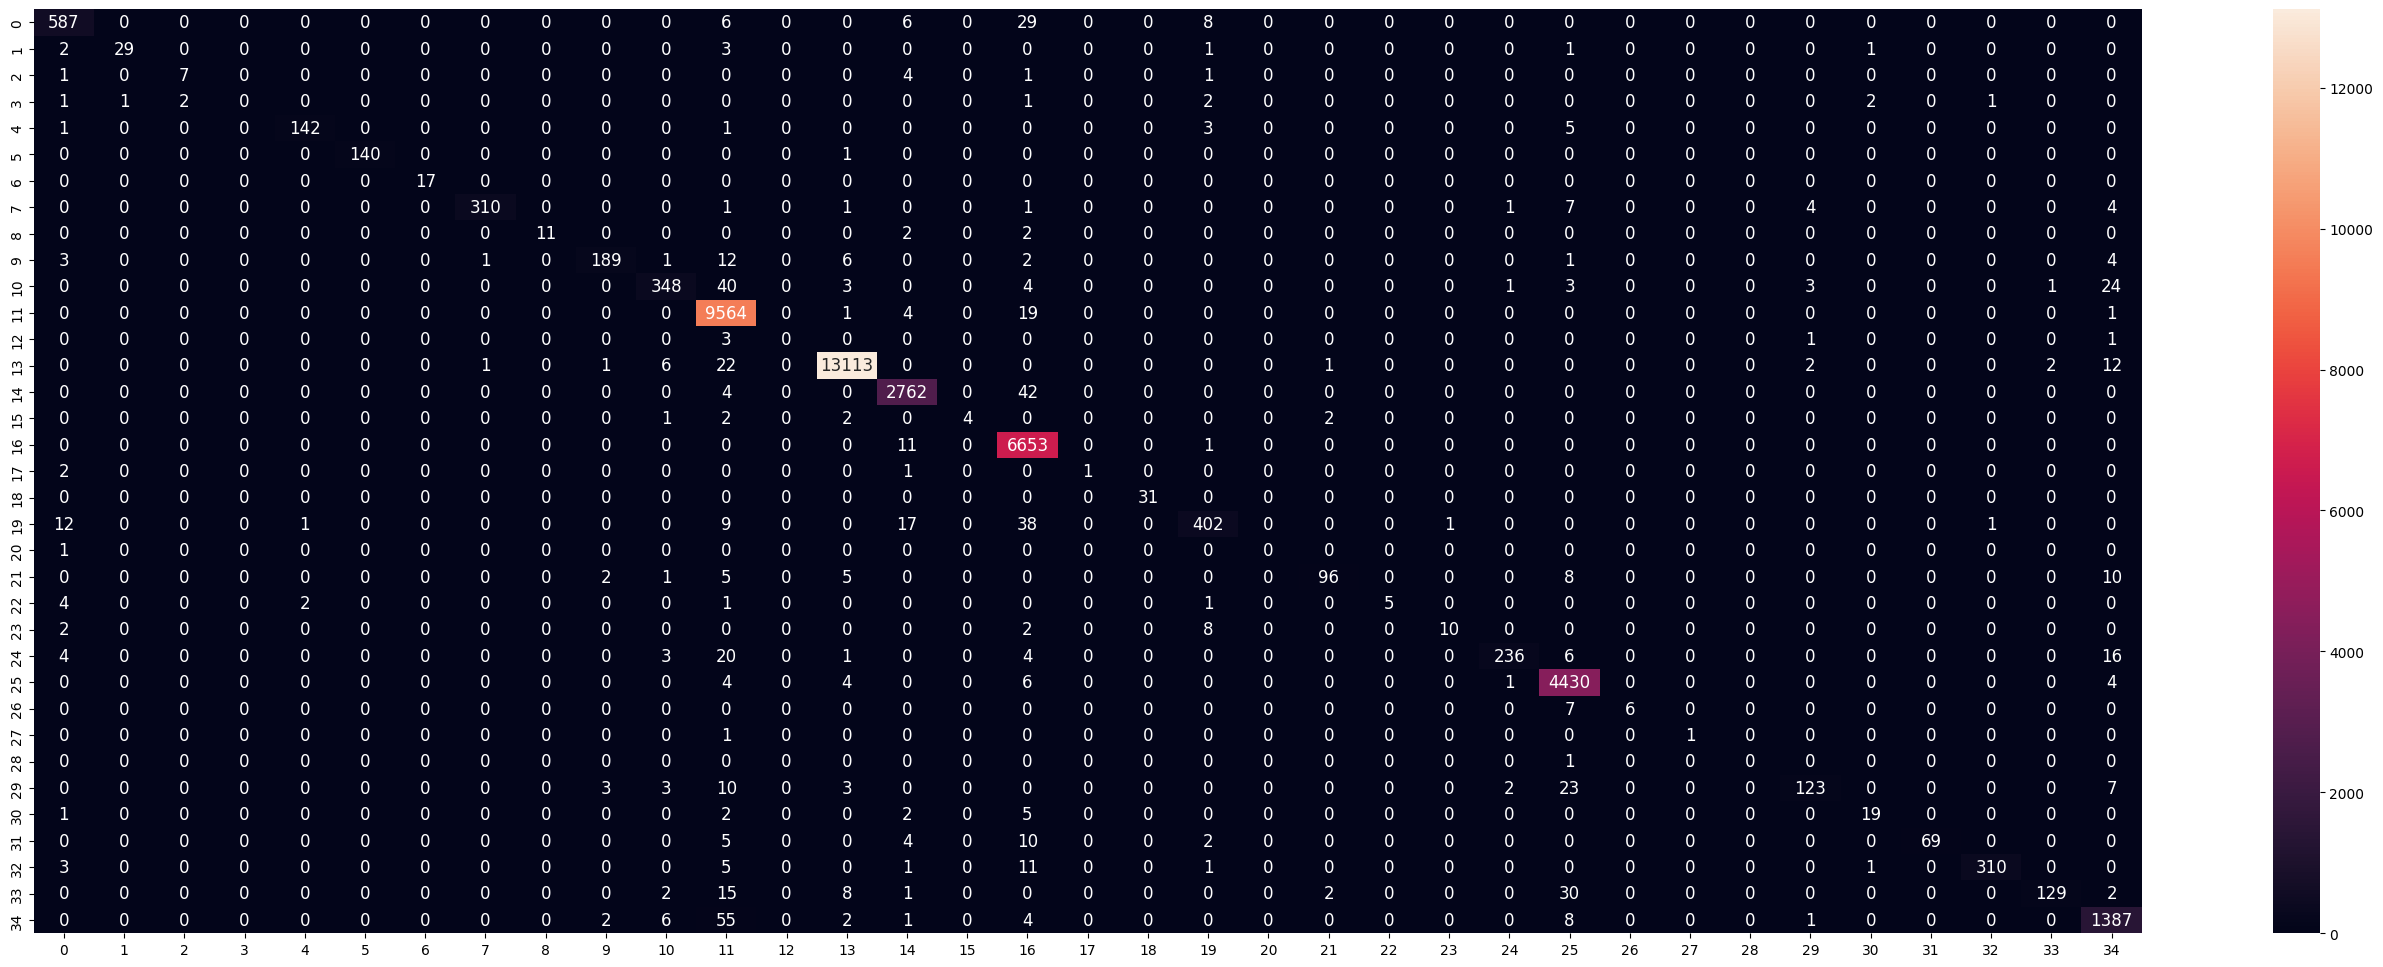

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(34,12))
sns.heatmap(cf_matrix,annot=True, ax=ax, fmt='d', annot_kws={"size": 12})
#plt.savefig("RF_cf2.png")

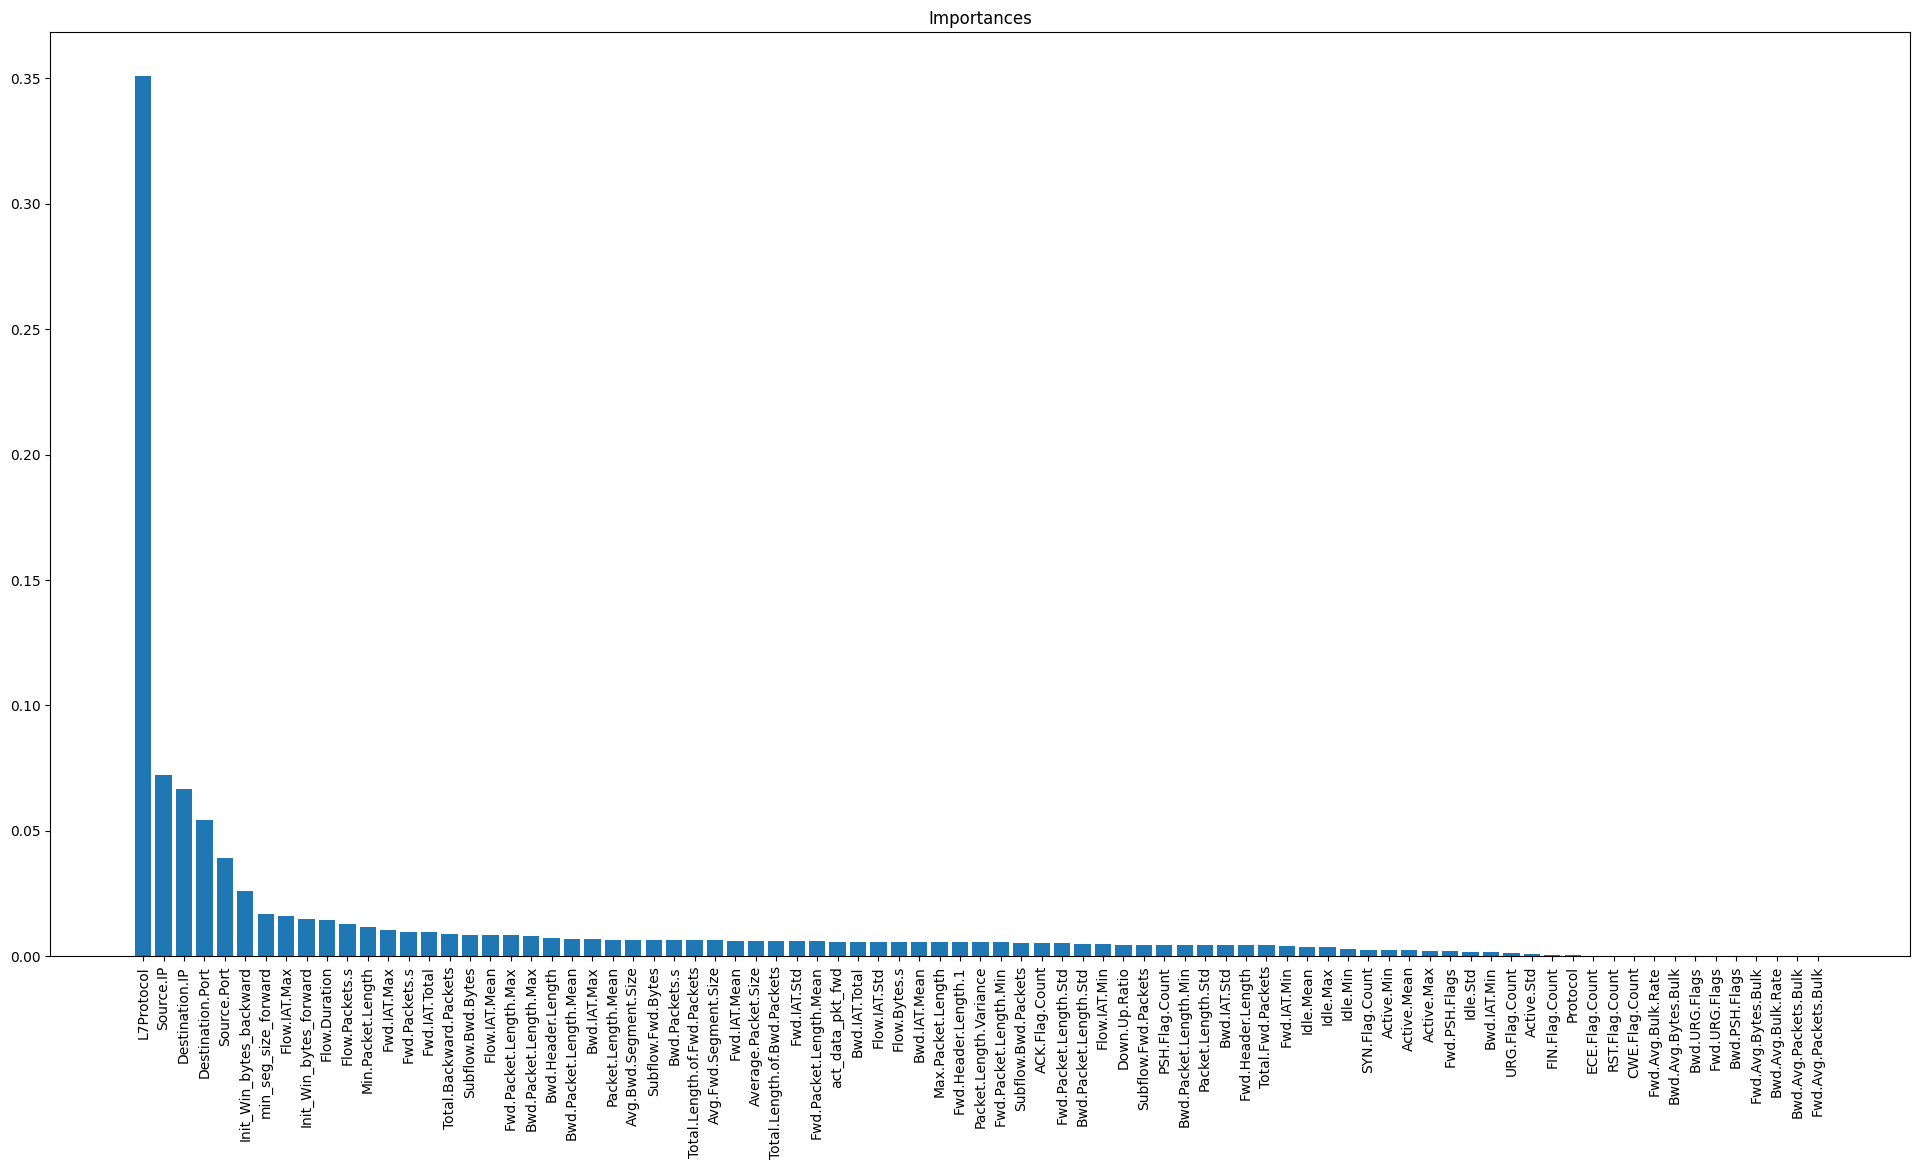

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [feats[i] for i in indices]
plt.figure(figsize=(24,12))
plt.title("Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.savefig("RF_features.png")